## Classification Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.feature_selection import VarianceThreshold,  mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [4]:
train = pd.read_csv('santander-train.csv')
test = pd.read_csv('santander-test.csv')
data = pd.concat([train, test])

In [5]:
data = data.head(20000)

In [6]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0


In [7]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## Remove Constant, Quasi constant, and Duplicate Features

In [9]:
constant_filter = VarianceThreshold(threshold=0.01) ## buang yg constant dan quasi constant 
constant_filter .fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [10]:
## buang duplicate features

X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.duplicated().sum()

18

In [11]:
duplicated_features = X_train_T.duplicated()

In [12]:
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [13]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 Fals

In [14]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,17282.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63200.700000
1,38270.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88640.610000
2,31526.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96314.160000
3,38737.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117568.020000
4,16469.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38333.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53324.460000
15996,26389.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56028.480000
15997,2025.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38272.440000
15998,17327.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [15]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

## Calculate the MI

In [16]:
mi = mutual_info_classif(X_train_unique, y_train)



In [17]:
len(mi)

227

In [18]:
mi

array([2.69156114e-03, 0.00000000e+00, 1.33327372e-02, 1.36778292e-03,
       0.00000000e+00, 2.73482095e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.40005664e-04, 0.00000000e+00, 0.00000000e+00,
       2.25911250e-03, 1.06223212e-03, 2.81112228e-03, 4.93136003e-04,
       2.78850586e-03, 3.58499681e-03, 0.00000000e+00, 2.23239293e-03,
       0.00000000e+00, 1.19879513e-03, 9.04640886e-03, 2.28559914e-04,
       6.75437699e-04, 1.27503894e-03, 0.00000000e+00, 0.00000000e+00,
       3.45416861e-04, 1.11349018e-03, 6.51278089e-04, 1.31874762e-03,
       2.51843203e-04, 2.28325500e-03, 3.88334504e-04, 0.00000000e+00,
       3.05014670e-04, 0.00000000e+00, 1.29373712e-02, 0.00000000e+00,
       0.00000000e+00, 4.12751016e-03, 7.16182745e-04, 1.23844245e-04,
       5.90953084e-04, 7.26645766e-03, 4.54025161e-03, 1.41048974e-02,
       3.46542778e-04, 8.22623670e-04, 0.00000000e+00, 2.80626603e-04,
       3.15050081e-03, 1.72363830e-03, 1.66208578e-03, 4.03851948e-04,
      

In [21]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [23]:
mi.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

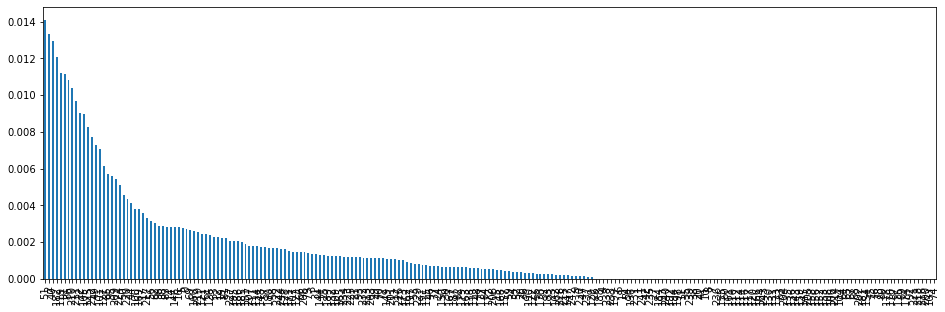

In [25]:
mi.plot.bar(figsize = (16, 5))

## kita bakal membuang beberapa features sesuai threshold atau percentilenya kalau di sini

In [28]:
sel = SelectPercentile(mutual_info_classif, percentile = 10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  22,  27,  40,  46,  49,  50,  51,  86,  91,  98, 101, 105,
            111, 119, 125, 127, 182, 187, 209, 210, 211, 212],
           dtype='int64')

In [31]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

In [32]:
X_train_mi.shape

(16000, 23)

## Build Model and Compare the Performance

In [33]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [34]:
%%time
run_randomForest(X_train_mi, X_test_mi, y_train, y_test)

Accuracy on test set: 
0.95775
Wall time: 494 ms


In [35]:
%%time
run_randomForest(X_train, X_test, y_train, y_test) ##yg original datasetnya

Accuracy on test set: 
0.9585
Wall time: 1.1 s


In [37]:
(1.1 - 0.494)/1.1 * 100

55.09090909090909

## Mutual Information Gain in Regression

In [39]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
boston = load_boston()

In [42]:
X = pd.DataFrame(data = boston.data, columns = boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
y = boston.target

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace=True)

In [46]:
mi

LSTAT      0.676733
RM         0.560908
INDUS      0.509925
PTRATIO    0.475263
NOX        0.447806
TAX        0.383251
CRIM       0.355901
AGE        0.340216
DIS        0.317410
RAD        0.224607
ZN         0.201478
B          0.152065
CHAS       0.024328
dtype: float64

<AxesSubplot:>

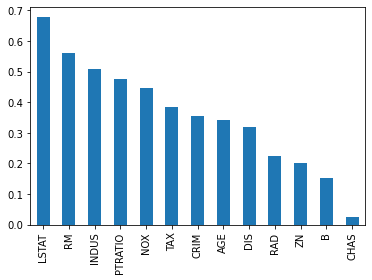

In [47]:
mi.plot.bar()

In [49]:
## select top 9 features aja

sel = SelectKBest(mutual_info_regression, k=9).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [51]:
r2_score(y_test, y_predict)

0.5892223849182507

In [52]:
np.sqrt(mean_squared_error(y_test, y_predict))

5.783509315085135

In [55]:
X_train_9 = sel.transform(X_train)
X_train_9.shape

(404, 9)

In [56]:
X_test_9 = sel.transform(X_test)

In [58]:
model = LinearRegression()
model.fit(X_train_9, y_train)
y_predict = model.predict(X_test_9)
print('r2_score')
r2_score(y_test, y_predict)

r2_score


0.531712760696157

In [59]:
print('rmse')
np.sqrt(mean_squared_error(y_test, y_predict))

rmse


6.175103151293751

In [ ]:
## hanya karena pake feature selection yg ini, bukan berarti bakal lebih bagus dari yg aslinya